In [2]:
import numpy as np
import pandas as pd

import os
os.chdir('C:/Users/Admin/Desktop/项目/第一天流失用户研究/')

import bokeh
from bokeh.io import output_notebook
output_notebook()
# 导入notebook绘图模块

from bokeh.plotting import figure,show
from bokeh.models import ColumnDataSource
# 导入图表绘制、图标展示模块
# 导入ColumnDataSource模块

pd.set_option('display.float_format',lambda x : '%.2f' % x)

Loading BokehJS ...

In [3]:
df_mission = pd.read_csv('主线任务记录1590550876053.csv')
df_message = pd.read_excel('当天流失用户信息：4.29~5.26.xlsx')
df_message = df_message[df_message['服务器ID'] != 2001]

1、主线是否存在卡点，卡在哪个地方

In [4]:
df_mission.head()

,区服,玩家id,玩家昵称,vip等级,角色等级,任务id,主线任务,奖励,时间
0,1,1048577,王羽儿,0,1,1,1,"{""items(物品)"":[[11004054,1]],""gold(花瓣)"":20000}",2020-04-29 09:57:54
1,1,1048579,席菁,0,1,1,1,"{""items(物品)"":[[11004054,1]],""gold(花瓣)"":20000}",2020-04-29 09:59:22
2,1,1048581,莫光殇,0,1,1,1,"{""items(物品)"":[[11004054,1]],""gold(花瓣)"":20000}",2020-04-29 09:59:57
3,1,1048580,易钰寒,0,1,1,1,"{""items(物品)"":[[11004054,1]],""gold(花瓣)"":20000}",2020-04-29 10:00:32
4,1,1048580,易钰寒,0,1,2,1,"{""vitality(元气)"":20000,""items(物品)"":[[11002006,1]]}",2020-04-29 10:01:31


In [5]:
df_message.head()

,角色ID,服务器ID,角色名称,等级,所属渠道,玩家类型,关联账号,手机标识,设备系统,用户IP,上次登录时间,创建时间,在线天数
0,104858013,100,李初瑾,1,4,0,558_82654078,b021281e-8ecc-37fb-a117-4d1b7b97c59e,HMA-AL00 -AndroidOS10,39.190.46.101,2020-04-29,2020-04-29,0
1,104858070,100,寒霓梧,1,4,0,558_82654699,71839ce3-5668-3b5c-b87a-7ee8ed78362f,MHA-AL00 -AndroidOS9,112.32.94.132,2020-04-29,2020-04-29,0
2,104857855,100,姬瑶,6,4,0,558_82652886,7f7ec833-80e8-31b2-86b6-093160f32d49,PADT00 -AndroidOS9,223.104.148.206,2020-04-29,2020-04-29,0
3,104857607,100,于晗,2,4,0,558_82647987,af81c5d2-3198-3207-9a74-de5d92cd4ce8,G8441 -AndroidOS8,112.96.102.9,2020-04-29,2020-04-29,0
4,104858936,100,南宫婷,4,4,0,558_82661109,b10d197d-3bd5-381d-8663-589c9154b9bc,V1816A -AndroidOS9,117.172.166.148,2020-04-29,2020-04-29,0


In [6]:
df_lost_list = df_message['角色ID']
df_lost_list = pd.DataFrame(df_lost_list)

lost_mission = pd.merge(df_mission,df_lost_list,left_on = '玩家id',right_on = '角色ID',how = 'right')[['角色ID','玩家id','任务id','主线任务']]
lost_mission.head(20)

,角色ID,玩家id,任务id,主线任务
0,1048579,1048579.00,1.00,1.00
1,1048579,1048579.00,2.00,1.00
2,1048579,1048579.00,3.00,48.00
3,1048579,1048579.00,4.00,47.00
4,1048579,1048579.00,5.00,1.00
5,1048579,1048579.00,6.00,17.00
6,1048581,1048581.00,1.00,1.00
7,1048584,1048584.00,1.00,1.00
8,1048584,1048584.00,2.00,1.00
9,1048599,1048599.00,1.00,1.00


Text(0, 0.5, '主线任务id')

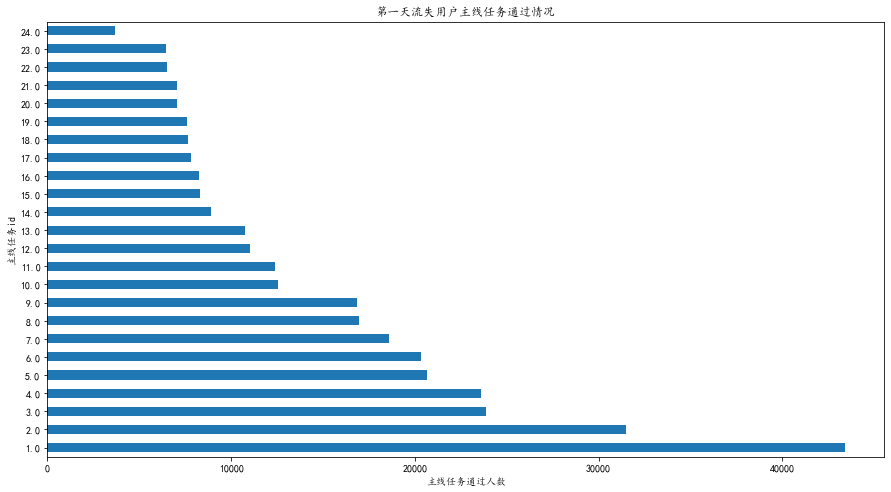

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['Kaiti'] 


plt.figure(figsize=(15,8))
lost_mission['任务id'].value_counts().head(24).plot.barh()

plt.title('第一天流失用户主线任务通过情况')
plt.xlabel('主线任务通过人数')
plt.ylabel('主线任务id')

Text(0, 0.5, '主线任务id')

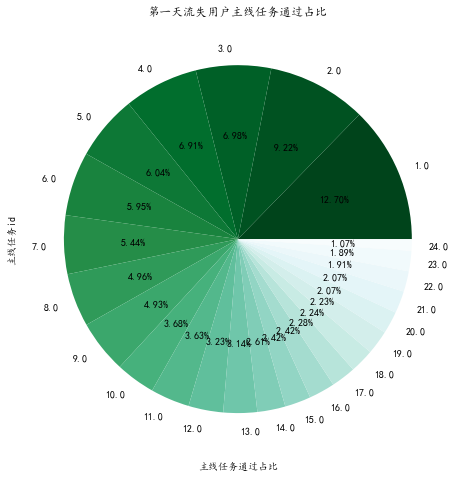

In [8]:
plt.figure(figsize=(15,8))
lost_mission['任务id'].value_counts().head(24).plot.pie(autopct='%.2f%%',colormap ='BuGn_r')
plt.title('第一天流失用户主线任务通过占比')
plt.xlabel('主线任务通过占比')
plt.ylabel('主线任务id')

2、次日送的道具是否满足玩家的需求

In [9]:
df_pay = pd.read_csv('普通商城购买记录1590570405575.csv')

In [10]:
df_pay.head().sort_values(['玩家id'])

,时间,区服,玩家id,玩家昵称,vip等级,角色等级,商城类型,商城子类型,商品id,货币类型,物品货币单价,购买数量,总消耗货币
0,2020-05-26 23:43:32,4,4196611,白汐瞳,0,20,服装购买商店(9),0,90000032,2,150,1,150
1,2020-05-26 23:41:24,4,4197622,东方羡,0,24,历练商城(8),0,80000007,13,280,1,280
2,2020-05-26 23:41:12,4,4197622,东方羡,0,24,历练商城(8),0,80000003,13,160,1,160
3,2020-05-26 23:41:01,4,4197622,东方羡,0,24,历练商城(8),0,80000012,13,90,1,90
4,2020-05-26 23:36:20,4,4201643,陶韶依,0,27,服装购买商店(9),0,90000006,2,75,1,75


In [11]:
#流失用户商城购买情况

lost_pay = pd.merge(df_pay,df_lost_list,left_on = '玩家id',right_on = '角色ID',how = 'right')
lost_pay.dropna(inplace = True)
lost_pay.head()

,时间,区服,玩家id,玩家昵称,vip等级,角色等级,商城类型,商城子类型,商品id,货币类型,物品货币单价,购买数量,总消耗货币,角色ID
0,2020-05-04 20:33:53,4.00,4202887.00,令狐琉璃,0.00,3.00,服装购买商店(9),0.00,90000001.00,2.00,100.00,1.00,100.00,4202887
1,2020-05-04 13:23:03,4.00,4202887.00,令狐琉璃,0.00,1.00,小游戏道具商城(7),0.00,70000001.00,2.00,20.00,1.00,20.00,4202887
2,2020-05-04 13:22:27,4.00,4202887.00,令狐琉璃,0.00,1.00,小游戏道具商城(7),0.00,70000001.00,2.00,20.00,1.00,20.00,4202887
3,2020-05-04 13:22:17,4.00,4202887.00,令狐琉璃,0.00,1.00,小游戏道具商城(7),0.00,70000001.00,2.00,20.00,1.00,20.00,4202887
4,2020-05-04 15:56:25,4.00,4202890.00,灵沫,0.00,1.00,小游戏道具商城(7),0.00,70000001.00,2.00,20.00,1.00,20.00,4202890


In [12]:
lost_pay_filiter = lost_pay[lost_pay['货币类型'] == 2]
lost_pay_filiter
mall_id = pd.read_excel('商城id.xlsx')

lost_pay_name = pd.merge(lost_pay_filiter,mall_id,left_on = '商品id',right_on = 'id',how = 'left')[['时间','玩家id','商城类型','商城子类型',
                                                                                                  '商品id','商品名称','购买数量','消耗货币名称']]
lost_pay_name['商品名称'].value_counts()

弈棋券      55257
悠水发       5242
诗兴券       3535
肥料        2292
荼蘼花种子     2044
         ...  
灵石           2
芳苞裙          1
天赐天赋丹        1
之洲坠          1
纵意发          1
Name: 商品名称, Length: 77, dtype: int64

In [13]:
#主线剧情强制购买的商品能否区分开来，拉取一个长周期的数据，观察不同时期道具偏好的变化情况
import datetime

df_pay_linyu = df_pay[df_pay['货币类型'] == 2]
df_pay_linyu['date'] = df_pay_linyu['时间'].str.split(' ').str[0]

df_pay_linyu = df_pay_linyu[['date','玩家id','商品id','货币类型','购买数量']]


pivot = pd.pivot_table(df_pay_linyu,values = ['购买数量'],
                     index = ['date','商品id'],aggfunc = np.sum)


E:\ancoda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [14]:
np.set_printoptions(suppress = True)

lst = df_pay_linyu['date'].unique().tolist()

c = pd.DataFrame()
for i in lst:
    c = pd.concat([c,pivot.loc[i].sort_values(['购买数量'],ascending = False)],axis = 1)
    
    ret = list(c.columns)
    columns_number = len(c.columns)
    ret[columns_number - 1] =  i
    c.columns = ret

c = c.fillna(0)

c_sort_T = c.T.sort_index()
c_sort_T.head()

商品id,1001,1002,1003,1004,1005,1006,11001,11002,11003,11004,...,90000081,90000082,90000083,90000084,90000085,90000086,90000087,90000088,90000089,90000090
2020-04-29,2.00,0.00,0.00,0.00,0.00,1.00,140.00,179.00,7.00,3.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-04-30,6.00,1.00,0.00,1.00,0.00,3.00,231.00,308.00,40.00,13.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-05-01,9.00,4.00,3.00,4.00,0.00,6.00,320.00,402.00,128.00,34.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-05-02,11.00,8.00,3.00,3.00,2.00,7.00,216.00,332.00,129.00,39.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-05-03,10.00,14.00,3.00,6.00,3.00,8.00,421.00,243.00,155.00,33.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [15]:
persons = []
for i in c_sort_T.columns:
    x = list(range(1,29))
    y = c_sort_T[i][:28]
    x_std = np.std(x)
    y_std = np.std(y)
    person = np.cov(x,y)[1][0] / (x_std * y_std)
    persons.append(person)
 

c['persons'] = persons
result = c.sort_values('persons',ascending = True)[['2020-04-29','2020-04-30','2020-05-01','2020-05-02','2020-05-03',
                                                    '2020-05-04','2020-05-05','2020-05-06','2020-05-07','2020-05-08',
                                                    '2020-05-09','2020-05-10','2020-05-11','2020-05-12','2020-05-13',
                                                    '2020-05-14','2020-05-15','2020-05-16','2020-05-17','2020-05-18',
                                                    '2020-05-19','2020-05-20','2020-05-21','2020-05-22','2020-05-23',
                                                    '2020-05-24','2020-05-25','2020-05-26','persons']]

pd.merge(result,mall_id,left_index = True,right_on = 'id',how = 'left').sort_values('2020-04-29',ascending = False).to_csv('数据源新.csv')

In [16]:
#流失用户商城购买情况

df_pay = pd.read_csv('普通商城购买记录1590570405575.csv')

lost_pay = pd.merge(df_pay,df_lost_list,left_on = '玩家id',right_on = '角色ID',how = 'right')
lost_pay.dropna(inplace = True)
lost_pay.head()

lost_pay_filiter = lost_pay[lost_pay['货币类型'] == 2]
lost_pay_filiter
mall_id = pd.read_excel('商城id.xlsx')

lost_pay_name = pd.merge(lost_pay_filiter,mall_id,left_on = '商品id',right_on = 'id',how = 'left')[['时间','玩家id','商城类型','商城子类型',
                                                                                                  '商品id','商品名称','购买数量','消耗货币名称']]
lost_pay_name['商品名称'].value_counts().head(20)

弈棋券       55257
悠水发        5242
诗兴券        3535
肥料         2292
荼蘼花种子      2044
鸢尾花种子      1706
丹桂种子       1576
龙魂花种子      1413
秋露白原酿      1143
天心草种子      1116
阿勃勒花种子      764
绘绪券         724
寒潭香原酿       668
金茎露原酿       618
百末旨原酿       544
野艾蒿种子       493
连珠券         488
莲花灯         475
璃蝶珠珰        350
回魂草种子       344
Name: 商品名称, dtype: int64

In [17]:
#玩家道具购买偏好

df_pay_filiter = df_pay[df_pay['货币类型'] == 2]

df_pay_name = pd.merge(df_pay_filiter,mall_id,left_on = '商品id',right_on = 'id',how = 'left')[['时间','玩家id','商城类型','商城子类型',
                                                                                                  '商品id','商品名称','购买数量','消耗货币名称']]
#不去重，灵玉
pivot =pd.pivot_table(df_pay_name,values = ['购买数量'],index = ['商品id'],aggfunc = np.sum)
pd.merge(pivot.sort_values('购买数量',ascending = False).tail(20),mall_id,left_index = True,right_on = 'id',how = 'left')[['商品名称','购买数量']]
#去重，灵玉
#df_pay_name[['玩家id','商品id','购买数量']].to_csv('2.csv')

,商品名称,购买数量
173.00,如斯链,87
174.00,祈霖链,84
171.00,宁殷钗,84
nan,NaN,81
136.00,佑灵伞,70
163.00,唤蛇链,68
nan,NaN,66
23.00,天赐随机丹,57
160.00,赴壑靴,53
nan,NaN,53


In [18]:
#不去重，服饰
df_pay_filiter2 = df_pay[(df_pay['货币类型'] == 2)|(df_pay['货币类型'] == 15)]
df_pay_name2 = pd.merge(df_pay_filiter2,mall_id,left_on = '商品id',right_on = 'id',how = 'left')[['时间','玩家id','商城类型','商城子类型',
                                                                                                  '商品id','商品名称','购买数量','消耗货币名称']]
pivot2 =pd.pivot_table(df_pay_name2,values = ['购买数量'],index = ['商品id'],aggfunc = np.sum)
pd.merge(pivot2.sort_values('购买数量',ascending = False).head(50),mall_id,left_index = True,right_on = 'id',how = 'left')[['商品名称','购买数量']]

#去重，服饰
#df_pay_name2[['玩家id','商品id','购买数量']].to_csv('2.csv')

,商品名称,购买数量
78,弈棋券,344294
41,丹桂种子,58845
36,荼蘼花种子,41361
38,龙魂花种子,28845
37,鸢尾花种子,28302
46,秋露白原酿,27595
95,悠水发,27380
79,诗兴券,27159
39,阿勃勒花种子,24965
43,天心草种子,19717
